In [2]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [0]:
#Read input file and understand the data
# "default" is my dependent variable

In [182]:
df = pd.read_csv("D:/my_work/residency4/lab/external/german_credit.csv")

In [183]:
# Lets build a Ensemble model but need to modify the dataset first
df.head()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [207]:
col_to_transform = ['account_check_status','credit_history','purpose','savings','present_emp_since','personal_status_sex','other_debtors','property',
                    'other_installment_plans','housing','job','telephone','foreign_worker']

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

# Print Shape of model data

for features in df.columns:
    if df[features].dtypes=='object':
        temp=pd.get_dummies(df,prefix=features)
        
df_concat = pd.concat([df,temp],axis=1)
print(df_concat.info())


In [208]:
df_with_dummies = pd.get_dummies( df, columns = col_to_transform )
df_with_dummies.head(5).T

,0,1,2,3,4
default,0,1,0,0,1
duration_in_month,6,48,12,42,24
credit_amount,1169,5951,2096,7882,4870
installment_as_income_perc,4,2,2,2,3
present_res_since,4,2,3,4,4
age,67,22,49,45,53
credits_this_bank,2,1,1,1,2
people_under_maintenance,1,1,2,2,2
account_check_status_0 <= ... < 200 DM,0,1,0,0,0
account_check_status_< 0 DM,1,0,0,1,1


### Check for highly correlated variables but don't required any treatment for this use case

In [209]:
df_with_dummies.corr()


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Drop the original variables which are converted to dummy

In [210]:
df_concat = df_with_dummies.drop(df_with_dummies[['telephone_none','foreign_worker_no']],axis=1)
df_concat.head(2).T

,0,1
default,0,1
duration_in_month,6,48
credit_amount,1169,5951
installment_as_income_perc,4,2
present_res_since,4,2
age,67,22
credits_this_bank,2,1
people_under_maintenance,1,1
account_check_status_0 <= ... < 200 DM,0,1
account_check_status_< 0 DM,1,0


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [221]:
from sklearn.model_selection import train_test_split

test_size = 0.30 # taking 70:30 training and test set
seed = 10 # Random numbmer seeding for reapeatability of the code
X=df_concat.drop('default',axis =1)
Y= df_concat['default']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [222]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500,n_jobs=2,criterion='entropy',random_state=9999)
rfcl = rfcl.fit(X_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [223]:
from sklearn import metrics
test_pred = rfcl.predict(X_test)


print(metrics.confusion_matrix(y_test, test_pred))
print("Test accuracy score",metrics.accuracy_score(y_test, test_pred))

[[191  12]
 [ 62  35]]
Test accuracy score 0.7533333333333333


### Q6 Show the list of the features importance( 1 Marks)

In [240]:
feat_labels = X_test.columns
for feature in zip(feat_labels, rfcl.feature_importances_):
    print(feature)

('duration_in_month', 0.0744873184339976)
('credit_amount', 0.0991110635104564)
('installment_as_income_perc', 0.035049040619919446)
('present_res_since', 0.033499816925959984)
('age', 0.07711484686291606)
('credits_this_bank', 0.01860405286712731)
('people_under_maintenance', 0.011146327881207231)
('account_check_status_0 <= ... < 200 DM', 0.018627399539517614)
('account_check_status_< 0 DM', 0.03744999017399866)
('account_check_status_>= 200 DM / salary assignments for at least 1 year', 0.007053921298870946)
('account_check_status_no checking account', 0.05740973634867999)
('credit_history_all credits at this bank paid back duly', 0.00994387009514323)
('credit_history_critical account/ other credits existing (not at this bank)', 0.020231968574457092)
('credit_history_delay in paying off in the past', 0.007962862472602413)
('credit_history_existing credits paid back duly till now', 0.01317406444519187)
('credit_history_no credits taken/ all credits paid back duly', 0.01144059614740639

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [224]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [225]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

LR: 0.744000 (0.050833)
LDA: 0.751000 (0.055758)
KNN: 0.662000 (0.055642)
CART: 0.664000 (0.044766)
NB: 0.725000 (0.042012)
SVM: 0.688000 (0.043081)


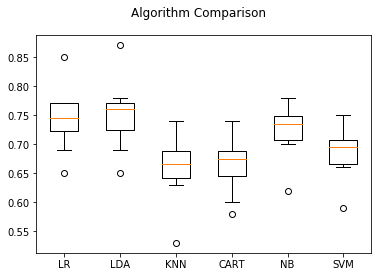

In [242]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [0]:
#Calculate Mean score

In [227]:
print("Mean Square Error: %.3f (%.3f)" % (-results.mean(), results.std()))

Mean Square Error: 0.282 (0.042)


In [0]:
# Calculate score standard deviation using std()

In [228]:
results = model_selection.cross_val_score(model, X, Y, scoring='r2', cv=kfold)
print("R2: %.3f (%.3f)" % (results.mean(), results.std()))

R2: -0.313 (0.176)


# Q8 Print the confusion matrix( 1 Marks)

In [230]:
lr = model.fit(X_train,y_train)
y_result = model.predict(X_test)
confusion_matrix= metrics.confusion_matrix(y_test, y_result)

print(confusion_matrix)


[[187  16]
 [ 65  32]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [237]:
print("Accuracy:",(confusion_matrix[0][0]+confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+
                                                                   confusion_matrix[1][1]))
print("Sensitivity / True positive rate",(confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1])))
print("F-precision - class0", confusion_matrix[0][0]/(confusion_matrix[0][0]+confusion_matrix[0][1]))
print("F-precision - class1", confusion_matrix[1][1]/(confusion_matrix[1][0]+confusion_matrix[1][1]))

Accuracy: 0.73
Sensitivity / True positive rate 0.9211822660098522
F-precision - class0 0.9211822660098522
F-precision - class1 0.32989690721649484


0.7829457364341085


[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
